In [2]:
import pandas as pd

# Load JSON
df = pd.read_json("filtered_prs.json")

In [3]:
num_users = df["user"].nunique()
users = df["user"].unique()
num_users

590

In [29]:
bipPerUser = {}
for user in users:
    count = 0
    for poster in df["user"]:
        if user == poster:
            count += 1
    bipPerUser[user] = count

sortedBPU = dict(sorted(bipPerUser.items(), reverse=True, key=lambda item: item[1]))
sortedBPU

{'achow101': 53,
 'jl2012': 52,
 'ysangkok': 47,
 'sipa': 45,
 'luke-jr': 36,
 'kallewoof': 29,
 'JeremyRubin': 26,
 'btcdrak': 26,
 'maflcko': 19,
 'jonasschnelli': 18,
 'jonatack': 17,
 'ajtowns': 16,
 'TheBlueMatt': 15,
 'katesalazar': 15,
 'NicolasDorier': 15,
 'dr-orlovsky': 14,
 'jonathancross': 14,
 'petertodd': 14,
 'azuchi': 13,
 'shaolinfry': 13,
 'sdaftuar': 12,
 'prusnak': 12,
 'instagibbs': 12,
 'jonasnick': 12,
 'Roasbeef': 11,
 'Gudnessuche': 11,
 'ghost': 11,
 'kallerosenbaum': 11,
 'justusranvier': 11,
 'afk11': 11,
 'CodeShark': 11,
 'theStack': 10,
 'dcousens': 10,
 'schildbach': 10,
 'murchandamus': 9,
 'maaku': 9,
 'cgilliard': 8,
 'laanwj': 8,
 'jameshilliard': 8,
 'Christewart': 7,
 'bigspider': 7,
 'psztorc': 7,
 'scgbckbone': 7,
 'RandyMcMillan': 7,
 'Sjors': 7,
 'stevenroose': 7,
 'dgpv': 7,
 'voisine': 7,
 'kanzure': 6,
 'OrfeasLitos': 6,
 'junderw': 6,
 'apoelstra': 6,
 'uvhw': 6,
 'harding': 6,
 'gavinandresen': 6,
 'fjahr': 5,
 'andrewtoth': 5,
 'real-or-r

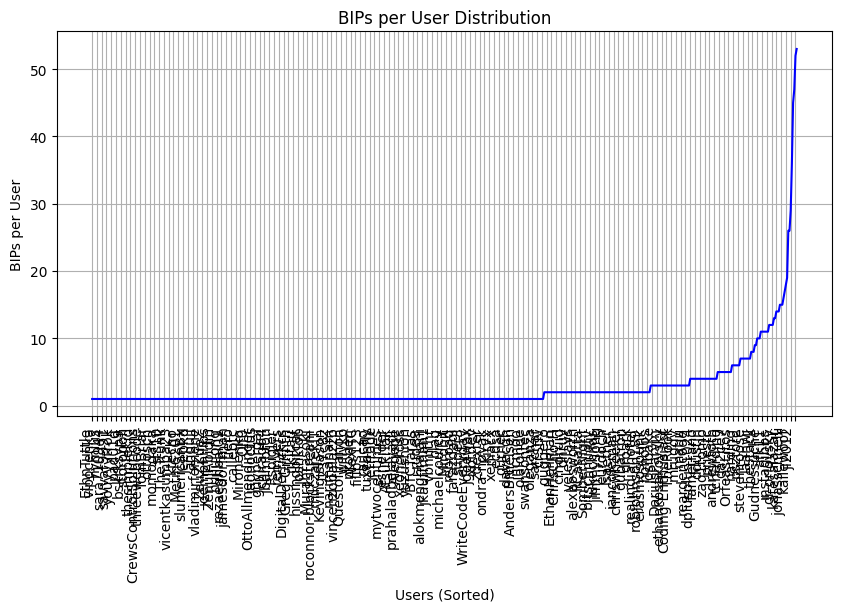

In [28]:
import matplotlib.pyplot as plt

X = 100

bottom_x = dict(sorted(sortedBPU.items(), key=lambda x: x[1], reverse=True)[:X])

# Extract labels and sizes
graphUsers = list(sortedBPU.keys())
graphBet = list(sortedBPU.values())


'''fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
ax.set_title(f"Top {X} Users by Betweenness Centrality")

plt.show()'''

plt.figure(figsize=(10, 5))
plt.plot(graphUsers, graphBet, linestyle='-', color='b')

# Labels and title
plt.xlabel("Users (Sorted)")
plt.xticks(graphUsers[::4])
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.ylabel("BIPs per User")
plt.title("BIPs per User Distribution")
plt.grid(True)

# Show the plot
plt.show()

In [30]:
import json
from collections import Counter

# Assuming your JSON data is in a file named 'data.json'
with open('reviewersNetX.json', 'r') as file:
    data = json.load(file)

# Initialize a counter
reviewer_counts = Counter()

# Go through each item in your data (assuming it's a list of dictionaries)
for entry in data:
    reviewers = entry.get('reviewers', [])
    reviewer_counts.update(reviewers)

# Convert to a list sorted by number of occurrences
sorted_reviewers = reviewer_counts.most_common()
print(len(sorted_reviewers))

# Display results
for reviewer, count in sorted_reviewers:
    print(f"{reviewer}: {count}")


384
jonatack: 159
murchandamus: 107
luke-jr: 63
jonasnick: 49
achow101: 31
sipa: 28
maflcko: 24
ajtowns: 23
real-or-random: 22
5twelve: 22
kallewoof: 21
Roasbeef: 19
benthecarman: 15
instagibbs: 14
apoelstra: 13
TheBlueMatt: 13
vostrnad: 12
bigspider: 11
JeremyRubin: 11
andrewtoth: 11
ProofOfKeags: 11
Sjors: 10
dr-orlovsky: 10
katesalazar: 10
harding: 10
manda2020panda: 10
jonathancross: 10
darosior: 9
michaelfolkson: 9
theStack: 8
kristapsk: 8
illesdavid: 8
junderw: 7
randolf: 7
Christewart: 6
scgbckbone: 6
ariard: 6
glozow: 6
josibake: 6
sanket1729: 6
clarkmoody: 6
jgriffiths: 5
akarve: 5
DanGould: 5
0xGRAV3R: 5
sdaftuar: 5
haleemshal: 5
vicariousdrama: 5
jnewbery: 5
Rspigler: 5
NicolasDorier: 5
dgpv: 5
jimpo: 5
fjahr: 4
EthanHeilman: 4
reardencode: 4
stratospher: 4
psztorc: 4
t-bast: 4
laanwj: 4
benma: 4
rustyrussell: 4
naumenkogs: 4
brandonblack: 4
vasild: 4
rex4539: 4
jonasschnelli: 3
moonsettler: 3
kingcathy23: 3
pinheadmz: 3
halseth: 3
augustoproiete: 3
roconnor-blockstream: 3
j

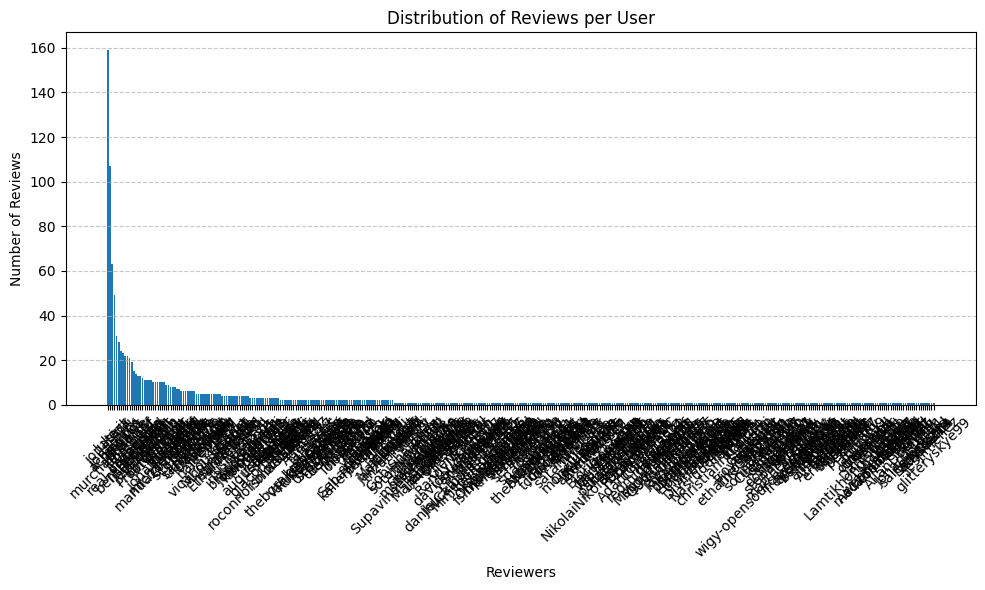

In [18]:
# Sort the reviewers by frequency
reviewers, counts = zip(*reviewer_counts.most_common())

# Plot the distribution
plt.figure(figsize=(10,6))
plt.bar(reviewers, counts)

# Customize the graph
plt.xlabel('Reviewers')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews per User')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()

In [19]:
import numpy as np

#define function to calculate Gini coefficient
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [ ]:
gini(np.array(counts)) #Inequality of reviewer representation among all users that contribute to BIPs

0.6379976508407518

In [ ]:
gini(np.array(graphBet)) #Inequality of BIP proposals from all users that have proposed any BIPs

0.5420668256749055

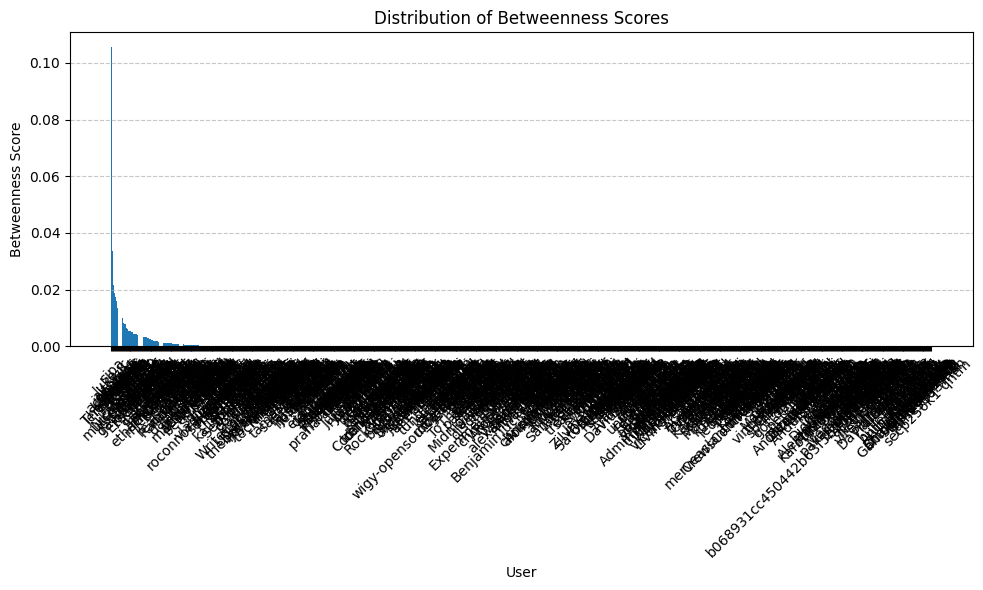

In [25]:
betweenDF = pd.read_csv('betweenness.csv')

# Sort the DataFrame by Betweenness Score descending
df_sorted = betweenDF.sort_values(by='Betweenness Score', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['User'], df_sorted['Betweenness Score'])

# Customize the plot
plt.xlabel('User')
plt.ylabel('Betweenness Score')
plt.title('Distribution of Betweenness Scores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [27]:
gini(np.array(df_sorted['Betweenness Score']))

0.9612593274348636